In [2]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load CSV data
file_path = 'ANN MAAM\\ANN_data.csv'  # replace with the actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Features (input variables) and Target (output variable - Id)
X = data[['Thickness', 'Al_Mole_Fraction', 'In_Mole_Fraction', 'Vd', 'Threshold_Voltage_Vth', 'Vg']]
y = data['Id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Thickness  Al_Mole_Fraction  In_Mole_Fraction  Vd  Threshold_Voltage_Vth  \
0       11.3              0.83              0.13   6                   -4.8   
1       11.3              0.83              0.13   6                   -4.8   
2       11.3              0.83              0.13   6                   -4.8   
3       11.3              0.83              0.13   6                   -4.8   
4       11.3              0.83              0.13   6                   -4.8   

    Vg     Id  
0  3.0  2.100  
1  2.0  2.090  
2  1.0  2.001  
3  0.0  1.900  
4 -1.0  1.650  


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Build the Ridge Neural Network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# Hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer (since we are predicting a continuous value, no activation function needed here)
model.add(Dense(1, activation='linear'))

# Compile the model (using Mean Squared Error for regression)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - loss: 0.8508 - val_loss: 1.0262
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7085 - val_loss: 0.8761
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6016 - val_loss: 0.7345
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5158 - val_loss: 0.6048
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4459 - val_loss: 0.4927
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3390 - val_loss: 0.3983
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3087 - val_loss: 0.3201
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2617 - val_loss: 0.2615
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2279 - val_loss: 0.2165
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1914 - val_loss: 0.1821
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1614 - val_loss: 0.1542
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1356 - val_l

Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0467 - val_loss: 0.0479
Epoch 71/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0465 - val_loss: 0.0476
Epoch 72/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0467 - val_loss: 0.0474
Epoch 73/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0461 - val_loss: 0.0474
Epoch 74/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0462 - val_loss: 0.0476
Epoch 75/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0459 - val_loss: 0.0478
Epoch 76/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0457 - val_loss: 0.0477
Epoch 77/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0458 - val_loss: 0.0474
Epoch 78/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0457 - val_loss: 0.0470
Epoch 79/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0455 - val_loss: 0.0468
Epoch 80/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0452 - val_loss: 0.0466
Epoch 81/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0453

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


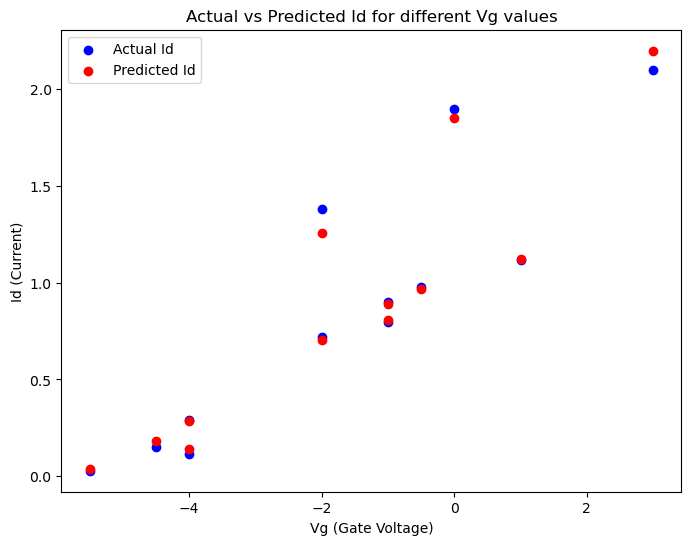

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output on the test set
y_pred = model.predict(X_test_scaled)

# Plot the relationship between Vg and the predicted Id
plt.figure(figsize=(8,6))
plt.scatter(X_test['Vg'], y_test, color='blue', label='Actual Id')
plt.scatter(X_test['Vg'], y_pred, color='red', label='Predicted Id')
plt.xlabel('Vg (Gate Voltage)')
plt.ylabel('Id (Current)')
plt.title('Actual vs Predicted Id for different Vg values')
plt.legend()
plt.show()


In [10]:
# Function to make predictions with new inputs
def predict_current(new_data):
    # Assume new_data is a dictionary with the input features
    new_df = pd.DataFrame(new_data, index=[0])
    
    # Scale the input data
    new_data_scaled = scaler.transform(new_df)
    
    # Predict using the trained model
    predicted_Id = model.predict(new_data_scaled)
    return predicted_Id[0][0]

# Example usage of the function
new_input = {
    'Thickness': 11.3,
    'Al_Mole_Fraction': 0.83,
    'In_Mole_Fraction': 0.13,
    'Vd': 6,
    'Threshold_Voltage_Vth': -4.8,
    'Vg': 3
}

predicted_Id = predict_current(new_input)
print(f'Predicted Id (Current) for the new inputs: {predicted_Id}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Id (Current) for the new inputs: 2.199643850326538
